# **전체 데이터 통합 EDA**

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns

import datetime

# Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')
# pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('전체 데이터 통합 3.csv', encoding='cp949')

data

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),내국인거주남성,외국인거주남성,내국인거주여성,외국인거주여성,배출량
0,2018-01-01,서귀포시,남원읍,11030.2331,9791.3235,11498.2617,10650.5811,13324.2924,10954.4914,15372.8110,...,58.9,1020.3,0.00,0.0,0.0,9806,428,9306,200,1239600
1,2018-01-01,서귀포시,대륜동,17647.5285,10160.5833,15216.9486,10298.1857,14152.0528,11361.8229,12541.6031,...,58.9,1020.3,0.00,0.0,0.0,6836,83,6637,95,1717700
2,2018-01-01,서귀포시,대정읍,12538.2881,7792.5662,14360.4369,6043.2109,16053.7231,8710.5446,19530.3550,...,58.4,1018.5,7.72,0.0,0.0,10360,841,10725,677,1264950
3,2018-01-01,서귀포시,대천동,10539.1926,7307.2766,10214.4234,7677.3523,7645.1222,8157.7877,7511.4389,...,58.9,1020.3,0.00,0.0,0.0,6685,107,6475,137,1765600
4,2018-01-01,서귀포시,동홍동,20141.3526,7741.1595,22060.7555,8331.2173,28043.7082,8607.6880,31639.5584,...,58.9,1020.3,0.00,0.0,0.0,11124,624,11569,642,4165050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48416,2021-06-30,제주시,일도2동,48057.8395,18562.2277,30770.1050,10532.0118,41791.7039,14277.3294,40655.9314,...,75.1,1004.0,19.91,0.0,5.3,16077,75,16569,200,4963450
48417,2021-06-30,제주시,조천읍,30216.3887,14827.6615,21878.8003,9076.8035,21784.9016,11604.2870,24200.9821,...,75.1,1004.0,19.91,0.0,5.3,13017,279,12422,242,2175450
48418,2021-06-30,제주시,한경면,9193.6955,3548.3814,6477.0927,1736.8238,6839.1511,2765.9751,7319.9596,...,94.4,998.0,16.37,0.0,5.6,4627,237,4531,100,973850
48419,2021-06-30,제주시,한림읍,26110.8260,17203.7474,25456.5456,12150.2043,20592.9715,13470.3068,29606.2524,...,94.4,998.0,16.37,0.0,5.6,10891,2090,10341,1140,3298100


In [3]:
print(list(data.columns))

['base_date', 'city', 'emd_nm', '0여성notvisit', '0여성visit', '0남성notvisit', '0남성visit', '10여성notvisit', '10여성visit', '10남성notvisit', '10남성visit', '20여성notvisit', '20여성visit', '20남성notvisit', '20남성visit', '30여성notvisit', '30여성visit', '30남성notvisit', '30남성visit', '40여성notvisit', '40여성visit', '40남성notvisit', '40남성visit', '50여성notvisit', '50여성visit', '50남성notvisit', '50남성visit', '60여성notvisit', '60여성visit', '60남성notvisit', '60남성visit', '70여성notvisit', '70여성visit', '70남성notvisit', '70남성visit', '80여성notvisit', '80여성visit', '80남성notvisit', '80남성visit', '장기체류외국인', '단기체류외국인', 'dayoff', 'use_amt배달', 'use_amt식품', 'use_amt농축수산물', 'use_amt마트/슈퍼마켓', 'use_amt간식', '평균기온(°C)', '일강수량(mm)', '평균 상대습도(%)', '평균 현지기압(hPa)', '합계 일사량(MJ/m2)', '일 최심신적설(cm)', '평균 전운량(1/10)', '내국인거주남성', '외국인거주남성', '내국인거주여성', '외국인거주여성', '배출량']


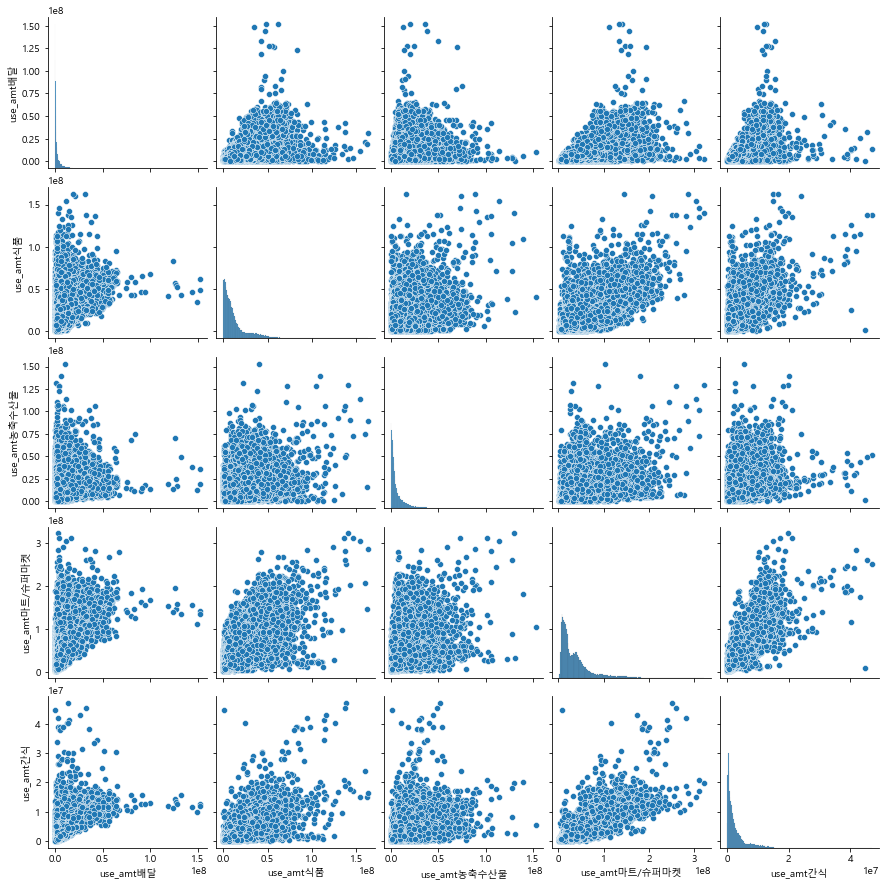

In [4]:
sns.pairplot(data[['use_amt배달', 'use_amt식품', 'use_amt농축수산물', 'use_amt마트/슈퍼마켓', 'use_amt간식']])
plt.show()

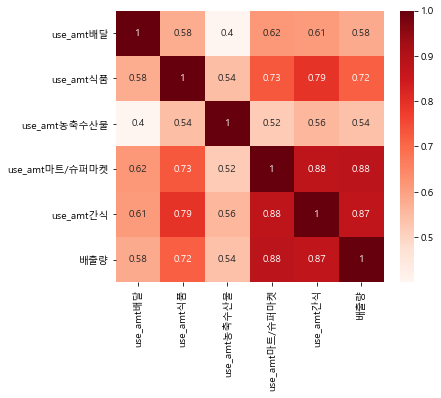

In [5]:
plt.figure(figsize=(6, 5))
sns.heatmap(data[['use_amt배달', 'use_amt식품', 'use_amt농축수산물', 'use_amt마트/슈퍼마켓', 'use_amt간식', '배출량']].corr(), annot=True, cmap='Reds')
plt.show()

In [6]:
(data.groupby('base_date').sum())['배출량'].describe()

count    1.277000e+03
mean     8.188739e+07
std      1.175100e+07
min      2.466165e+07
25%      7.485625e+07
50%      8.120520e+07
75%      8.864526e+07
max      1.346865e+08
Name: 배출량, dtype: float64

In [7]:
float = pd.read_csv('../../../../../Source/2021 빅콘테스트/2021 빅콘테스트_ECO제주/01_제공데이터_update(210811)/02-1_내국인유동인구_KOREAN.csv', encoding='cp949')

float

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,638.5509,15.5400,151.5149,제주
1,2018-01-01,1,제주시,50110250,한림읍,여성,0,0.0000,3.7249,171.3458,그외
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668.4577,17.0308,166.0500,제주
3,2018-01-01,1,제주시,50110250,한림읍,여성,10,0.0000,4.2577,195.8539,그외
4,2018-01-01,1,제주시,50110250,한림읍,여성,20,609.7710,5.9490,148.7246,제주
...,...,...,...,...,...,...,...,...,...,...,...
47250191,2021-06-30,24,서귀포시,50130620,예래동,남성,20,0.0000,0.0000,599.1969,그외
47250192,2021-06-30,24,서귀포시,50130620,예래동,남성,20,187.5990,41.9998,75.5996,제주
47250193,2021-06-30,24,서귀포시,50130620,예래동,남성,10,121.8467,0.0000,4.5128,제주
47250194,2021-06-30,24,서귀포시,50130620,예래동,남성,80,122.2190,0.0000,4.5032,제주
